# Initializing Datset and Variables

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,LSTM,GRU,Bidirectional,Dropout
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X = pd.read_csv('/content/drive/MyDrive/Data_Challenge_PHM2024_test_data/X_train.csv')
Y = pd.read_csv('/content/drive/MyDrive/Data_Challenge_PHM2024_test_data/y_train.csv')

X.head()

,id,trq_measured,oat,mgt,pa,ias,np,ng
0,0,54.100,2.00000,544.5000,212.1408,74.56250,89.18000,99.6400
1,1,49.625,24.22231,578.4844,1625.6400,30.35596,99.55273,91.3866
2,2,52.000,7.00000,566.1000,1912.9250,65.62500,100.14000,90.9600
3,3,62.400,7.25000,560.1000,277.0632,54.81250,90.64000,100.2800
4,4,62.900,23.25000,593.7000,53.6448,73.43750,99.91000,92.1700


In [ ]:
Y.head()

,id,faulty,trq_margin
0,0,1,-13.717745
1,1,0,1.791863
2,2,1,-13.944871
3,3,0,-0.017281
4,4,0,7.322404


In [ ]:
X_plot = X.iloc[:1000,1:]

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas

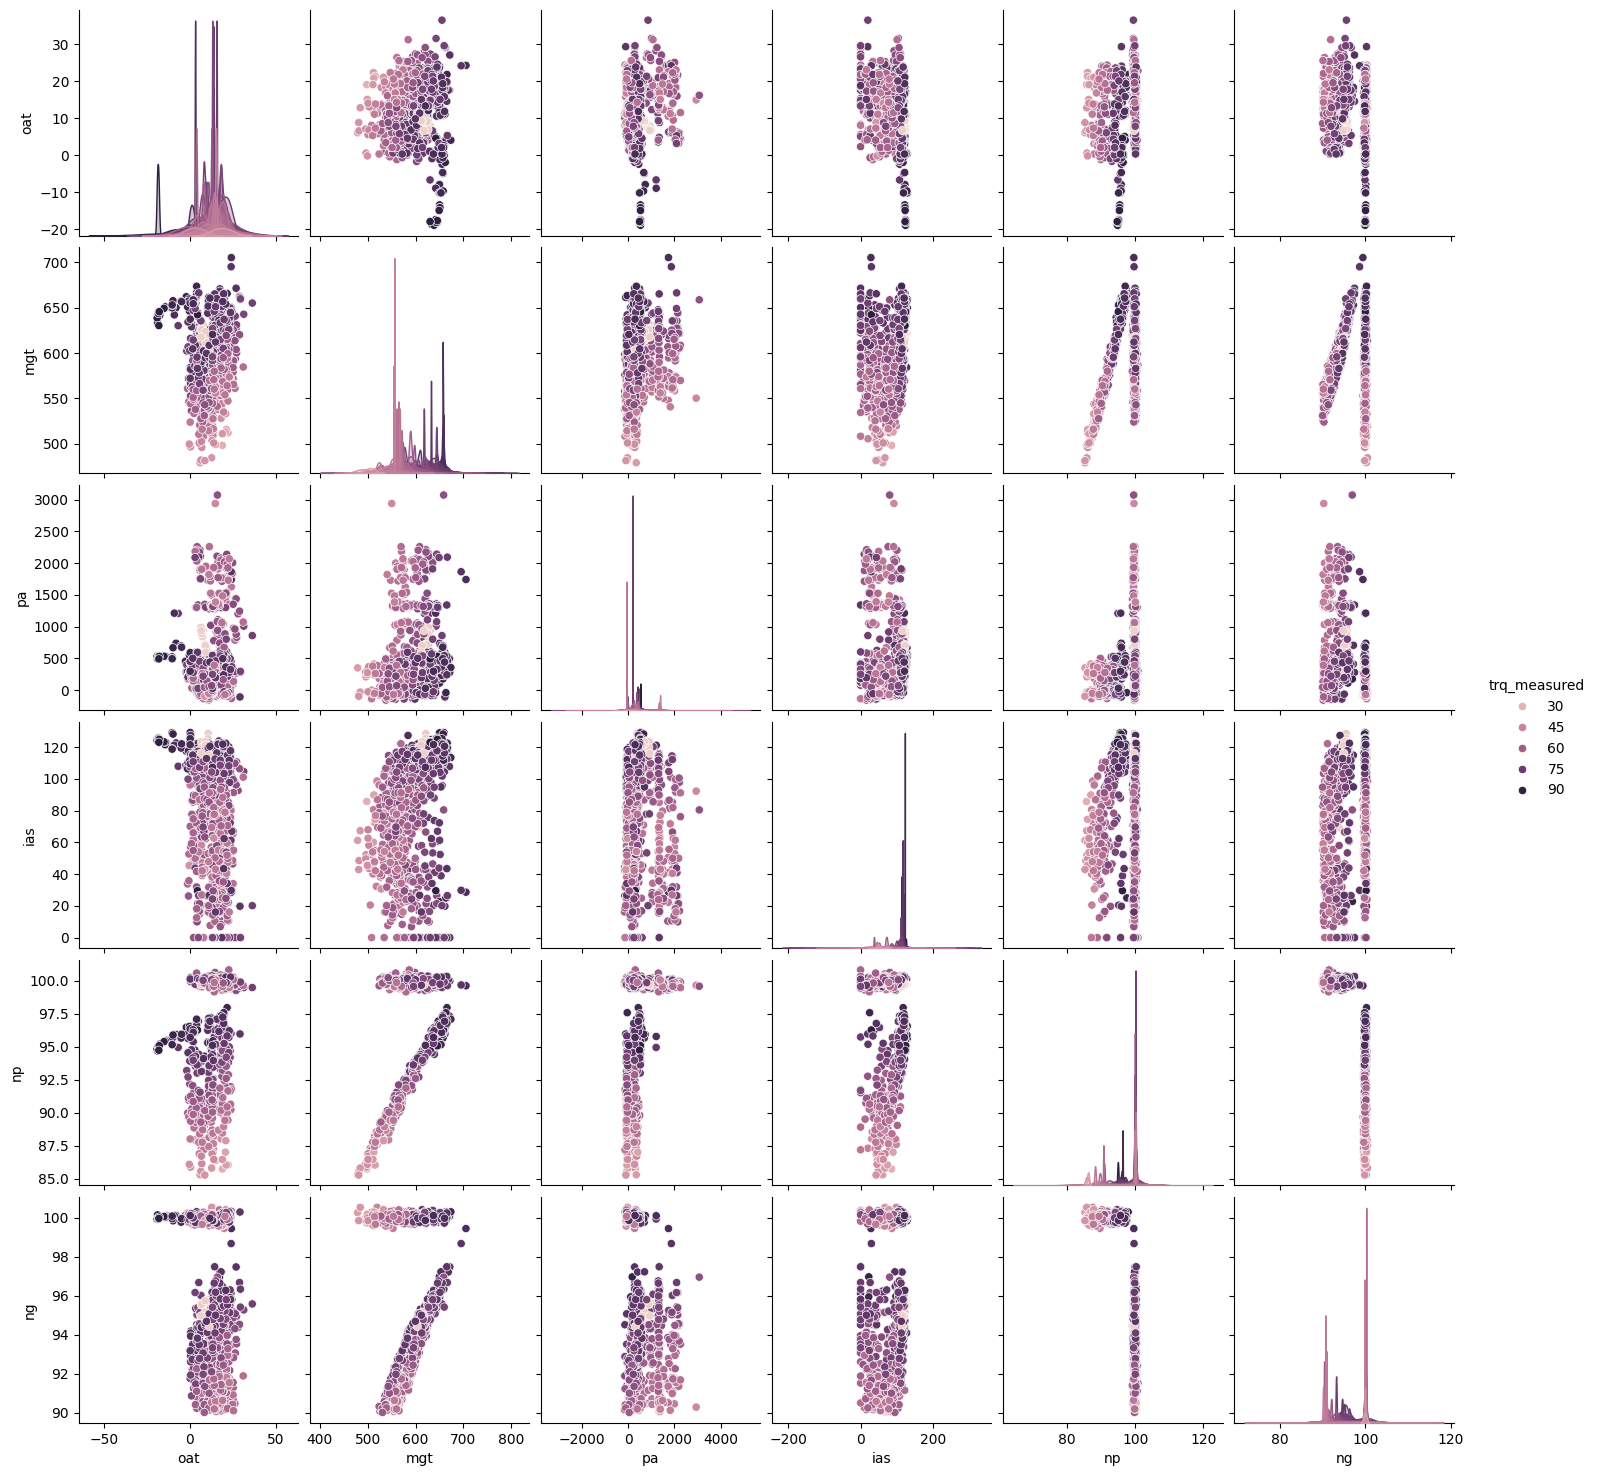

In [ ]:
sns.pairplot(X_plot, hue='trq_measured', size=2.5);

## Scaling Data and removing unwanted Columns

In [ ]:
X = X.iloc[:,1:]
Y = Y.iloc[:,1:]

Y['trq_margin'] = (Y['trq_margin'] - Y['trq_margin'].min()) / (Y['trq_margin'].max() - Y['trq_margin'].min())

In [ ]:
Y.head()

,faulty,trq_margin
0,1,0.560437
1,0,0.702863
2,1,0.558352
3,0,0.686250
4,0,0.753651


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(594100, 7)

In [ ]:
X_test.shape

(148525, 7)

In [ ]:
n_epoch = 5
b_size = 64
val_dat = (X_test, Y_test)

# Building structure for the Neural Network

## Simple Network with Dropout

In [ ]:
model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(X_train, Y_train, epochs=n_epoch, batch_size=b_size, validation_data = val_dat)

Epoch 1/5
9283/9283 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.6791 - loss: 0.2074 - val_accuracy: 0.8492 - val_loss: 0.0612
Epoch 2/5
9283/9283 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.8562 - loss: 0.0549 - val_accuracy: 0.9494 - val_loss: 0.0248
Epoch 3/5
9283/9283 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.9133 - loss: 0.0335 - val_accuracy: 0.9439 - val_loss: 0.0193
Epoch 4/5
9283/9283 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.9250 - loss: 0.0281 - val_accuracy: 0.9296 - val_loss: 0.0218
Epoch 5/5
9283/9283 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9261 - loss: 0.0275 - val_accuracy: 0.9518 - val_loss: 0.0195


In [ ]:
y_pred = model.predict(X_test)
y_pred.shape

4642/4642 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


(148525, 2)

In [ ]:
y_binary_pred = np.round(y_pred[:,0])
y_continuous_pred  = y_pred[:,1]

Text(95.72222222222221, 0.5, 'Truth')

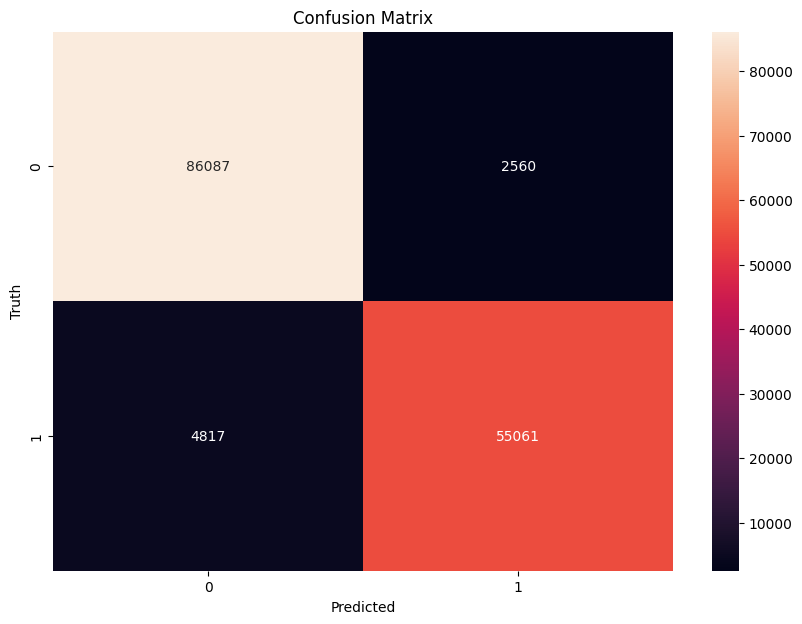

In [ ]:
cm = tf.math.confusion_matrix(labels= Y_test['faulty'] ,predictions=y_binary_pred)


plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

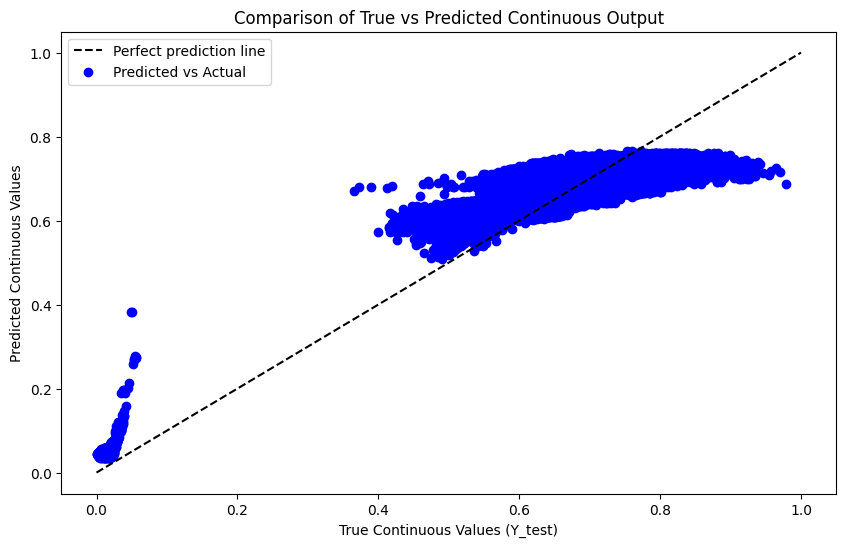

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot([0, 1], [0, 1], 'k--', label='Perfect prediction line')

plt.scatter(Y_test['trq_margin'], y_continuous_pred, color='blue', label='Predicted vs Actual')

plt.xlabel('True Continuous Values (Y_test)')
plt.ylabel('Predicted Continuous Values')
plt.title('Comparison of True vs Predicted Continuous Output')
plt.legend()

plt.show()

Rescaling and checking MSE , MAE and R2 Score

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


Y = pd.read_csv('/content/drive/MyDrive/Data_Challenge_PHM2024_test_data/y_train.csv')

trq_min = Y['trq_margin'].min()
trq_max = Y['trq_margin'].max()

# Inverse scaling function
def inverse_scaling(scaled_values, min_value, max_value):
    return scaled_values * (max_value - min_value) + min_value

# Inverse scaling for the predicted values
y_continuous_pred_rescaled = inverse_scaling(y_continuous_pred, trq_min, trq_max)
Y_test['trq_margin'] = inverse_scaling(Y_test['trq_margin'], trq_min, trq_max)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test['trq_margin'], y_continuous_pred_rescaled)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test['trq_margin'], y_continuous_pred_rescaled)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared (R²) - how well the predictions approximate the true values
r2 = r2_score(Y_test['trq_margin'], y_continuous_pred_rescaled)
print(f"R-squared (R²): {r2}")

#Rescaling
Y_test['trq_margin'] = (Y_test['trq_margin'] - Y_test['trq_margin'].min()) / (Y_test['trq_margin'].max() - Y_test['trq_margin'].min())

Mean Squared Error (MSE): 30.877763444669707
Mean Absolute Error (MAE): 4.475786929651479
R-squared (R²): 0.844926180117154


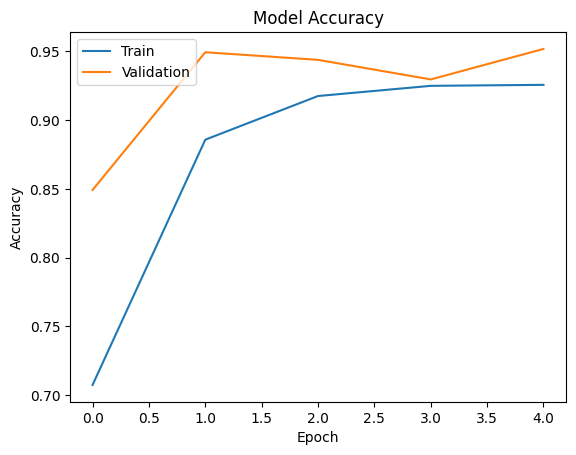

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## LSTM Model

In [ ]:
from tensorflow.keras import backend as K

# Clear the previous model's session
K.clear_session()

model = Sequential()

model.add(LSTM(32, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))


model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 32)                  │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,538 (29.45 KB)

 Trainable params: 7,538 (29.45 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, Y_train, epochs=n_epoch, batch_size=b_size, validation_data = val_dat)

Epoch 1/5
9283/9283 ━━━━━━━━━━━━━━━━━━━━ 59s 6ms/step - accuracy: 0.7917 - loss: 0.0799 - val_accuracy: 0.9055 - val_loss: 0.0360
Epoch 2/5
9283/9283 ━━━━━━━━━━━━━━━━━━━━ 58s 6ms/step - accuracy: 0.9223 - loss: 0.0300 - val_accuracy: 0.9372 - val_loss: 0.0204
Epoch 3/5
9283/9283 ━━━━━━━━━━━━━━━━━━━━ 55s 6ms/step - accuracy: 0.9379 - loss: 0.0239 - val_accuracy: 0.9578 - val_loss: 0.0163
Epoch 4/5
9283/9283 ━━━━━━━━━━━━━━━━━━━━ 80s 6ms/step - accuracy: 0.9390 - loss: 0.0234 - val_accuracy: 0.9464 - val_loss: 0.0182
Epoch 5/5
9283/9283 ━━━━━━━━━━━━━━━━━━━━ 81s 6ms/step - accuracy: 0.9456 - loss: 0.0212 - val_accuracy: 0.9244 - val_loss: 0.0273


In [ ]:
y_pred = model.predict(X_test)
y_pred.shape

4642/4642 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


(148525, 2)

In [ ]:
y_binary_pred = np.round(y_pred[:,0])
y_continuous_pred  = y_pred[:,1]

Text(95.72222222222221, 0.5, 'Truth')

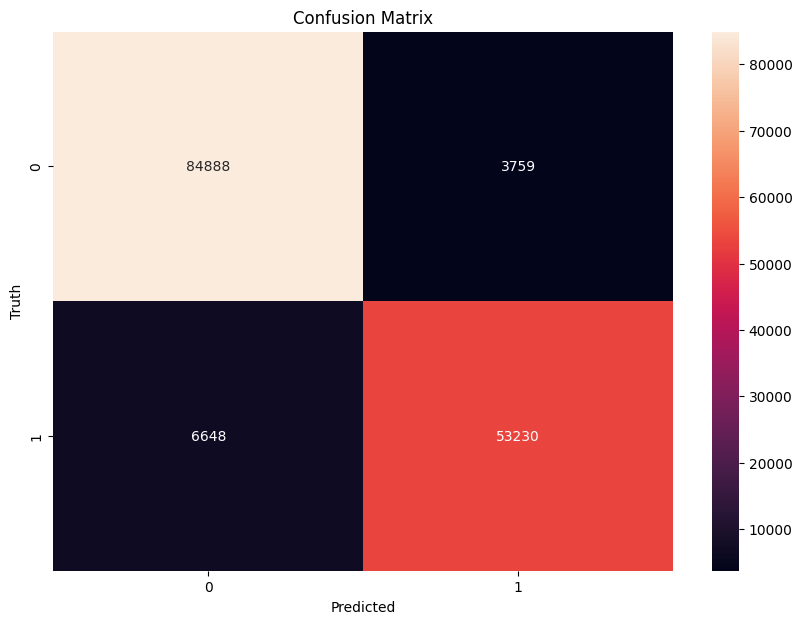

In [ ]:
cm = tf.math.confusion_matrix(labels= Y_test['faulty'] ,predictions=y_binary_pred)


plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

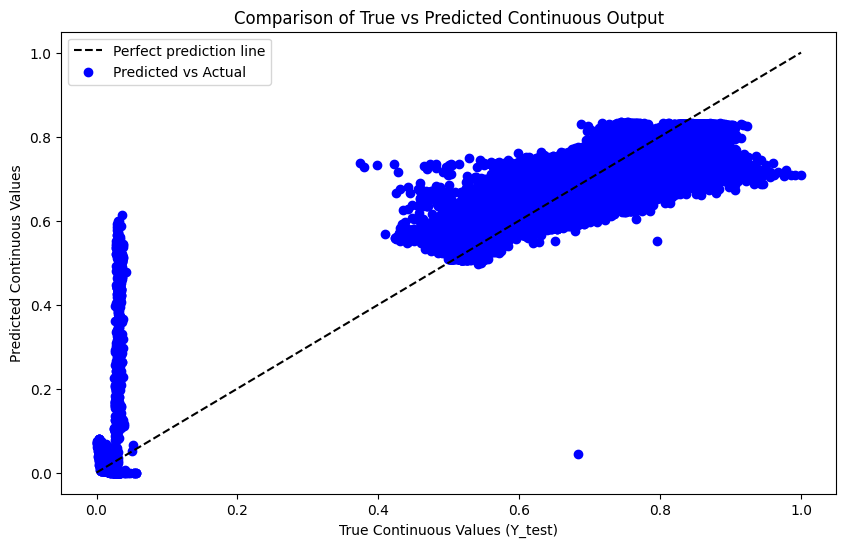

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot([0, 1], [0, 1], 'k--', label='Perfect prediction line')

plt.scatter(Y_test['trq_margin'], y_continuous_pred, color='blue', label='Predicted vs Actual')

plt.xlabel('True Continuous Values (Y_test)')
plt.ylabel('Predicted Continuous Values')
plt.title('Comparison of True vs Predicted Continuous Output')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


Y = pd.read_csv('/content/drive/MyDrive/Data_Challenge_PHM2024_test_data/y_train.csv')

trq_min = Y['trq_margin'].min()
trq_max = Y['trq_margin'].max()

# Inverse scaling function
def inverse_scaling(scaled_values, min_value, max_value):
    return scaled_values * (max_value - min_value) + min_value

# Inverse scaling for the predicted values
y_continuous_pred_rescaled = inverse_scaling(y_continuous_pred, trq_min, trq_max)
Y_test['trq_margin'] = inverse_scaling(Y_test['trq_margin'], trq_min, trq_max)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test['trq_margin'], y_continuous_pred_rescaled)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test['trq_margin'], y_continuous_pred_rescaled)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared (R²) - how well the predictions approximate the true values
r2 = r2_score(Y_test['trq_margin'], y_continuous_pred_rescaled)
print(f"R-squared (R²): {r2}")

#Rescaling
Y_test['trq_margin'] = (Y_test['trq_margin'] - Y_test['trq_margin'].min()) / (Y_test['trq_margin'].max() - Y_test['trq_margin'].min())

Mean Squared Error (MSE): 34.54122697706053
Mean Absolute Error (MAE): 4.242443821881751
R-squared (R²): 0.834028671412436


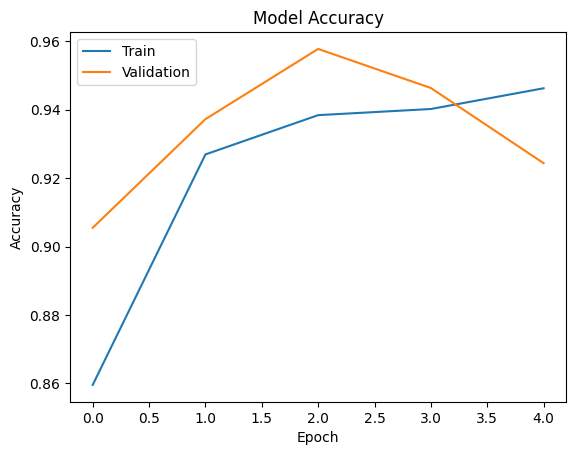

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Bidirectional LSTM Model

In [ ]:
K.clear_session()

model = Sequential()

model.add(Bidirectional(LSTM(32, activation='relu'), input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 64)                  │           8,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,938 (54.45 KB)

 Trainable params: 13,938 (54.45 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, Y_train, epochs=n_epoch, batch_size=b_size, validation_data = val_dat)

Epoch 1/5
9283/9283 ━━━━━━━━━━━━━━━━━━━━ 83s 9ms/step - accuracy: 0.6613 - loss: 0.1546 - val_accuracy: 0.9222 - val_loss: 0.0263
Epoch 2/5
9283/9283 ━━━━━━━━━━━━━━━━━━━━ 76s 8ms/step - accuracy: 0.9116 - loss: 0.0330 - val_accuracy: 0.9477 - val_loss: 0.0175
Epoch 3/5
9283/9283 ━━━━━━━━━━━━━━━━━━━━ 85s 8ms/step - accuracy: 0.9396 - loss: 0.0222 - val_accuracy: 0.9620 - val_loss: 0.0138
Epoch 4/5
9283/9283 ━━━━━━━━━━━━━━━━━━━━ 81s 8ms/step - accuracy: 0.9507 - loss: 0.0187 - val_accuracy: 0.9539 - val_loss: 0.0171
Epoch 5/5
9283/9283 ━━━━━━━━━━━━━━━━━━━━ 79s 8ms/step - accuracy: 0.9521 - loss: 0.0179 - val_accuracy: 0.9649 - val_loss: 0.0156


In [ ]:
y_pred = model.predict(X_test)
y_pred.shape

4642/4642 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step


(148525, 2)

In [ ]:
y_binary_pred = np.round(y_pred[:,0])
y_continuous_pred  = y_pred[:,1]

Text(95.72222222222221, 0.5, 'Truth')

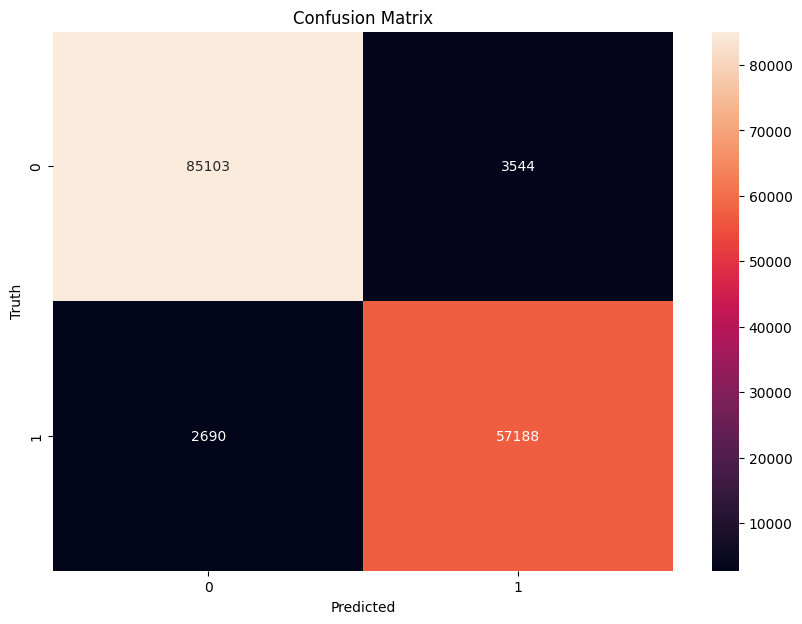

In [ ]:
cm = tf.math.confusion_matrix(labels= Y_test['faulty'] ,predictions=y_binary_pred)


plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

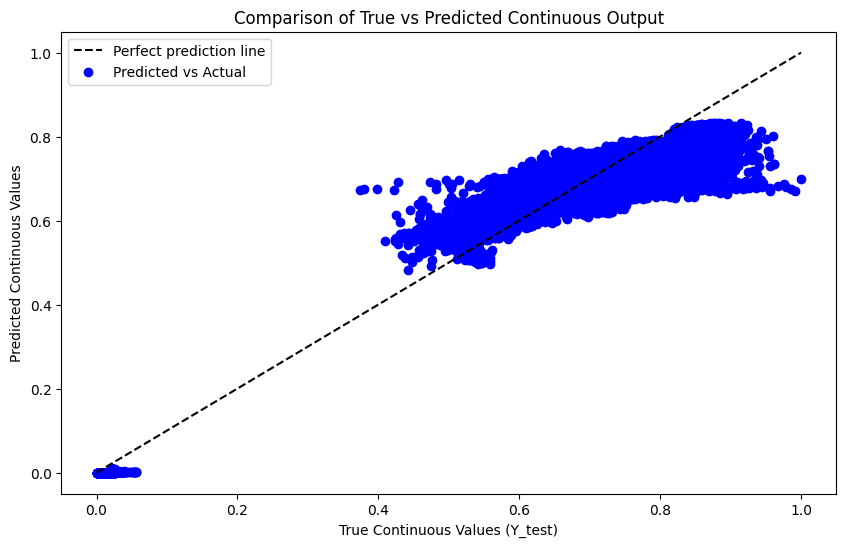

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot([0, 1], [0, 1], 'k--', label='Perfect prediction line')

plt.scatter(Y_test['trq_margin'], y_continuous_pred, color='blue', label='Predicted vs Actual')

plt.xlabel('True Continuous Values (Y_test)')
plt.ylabel('Predicted Continuous Values')
plt.title('Comparison of True vs Predicted Continuous Output')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


Y = pd.read_csv('/content/drive/MyDrive/Data_Challenge_PHM2024_test_data/y_train.csv')

trq_min = Y['trq_margin'].min()
trq_max = Y['trq_margin'].max()

# Inverse scaling function
def inverse_scaling(scaled_values, min_value, max_value):
    return scaled_values * (max_value - min_value) + min_value

# Inverse scaling for the predicted values
y_continuous_pred_rescaled = inverse_scaling(y_continuous_pred, trq_min, trq_max)
Y_test['trq_margin'] = inverse_scaling(Y_test['trq_margin'], trq_min, trq_max)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test['trq_margin'], y_continuous_pred_rescaled)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test['trq_margin'], y_continuous_pred_rescaled)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared (R²) - how well the predictions approximate the true values
r2 = r2_score(Y_test['trq_margin'], y_continuous_pred_rescaled)
print(f"R-squared (R²): {r2}")

#Rescaling
Y_test['trq_margin'] = (Y_test['trq_margin'] - Y_test['trq_margin'].min()) / (Y_test['trq_margin'].max() - Y_test['trq_margin'].min())

Mean Squared Error (MSE): 26.38215549246122
Mean Absolute Error (MAE): 4.178906946150837
R-squared (R²): 0.8732331830309488


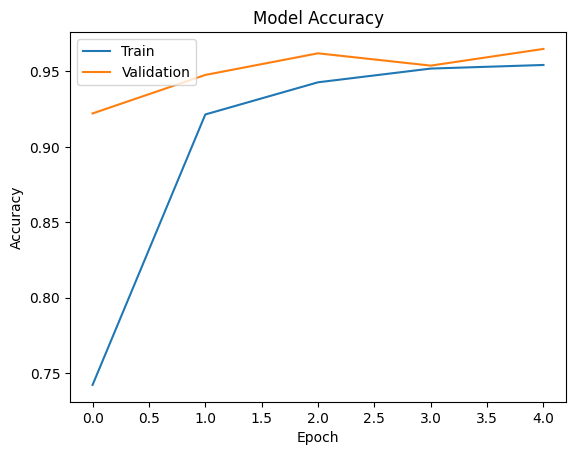

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## GRU Model

In [ ]:
K.clear_session()

model = Sequential()

model.add(GRU(32, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 32)                  │           3,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,546 (25.57 KB)

 Trainable params: 6,546 (25.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, Y_train, epochs=n_epoch, batch_size=b_size, validation_data = ())

Epoch 1/5
9283/9283 ━━━━━━━━━━━━━━━━━━━━ 63s 7ms/step - accuracy: 0.7577 - loss: 0.0888 - val_accuracy: 0.9318 - val_loss: 0.0311
Epoch 2/5
9283/9283 ━━━━━━━━━━━━━━━━━━━━ 80s 6ms/step - accuracy: 0.9043 - loss: 0.0340 - val_accuracy: 0.9320 - val_loss: 0.0207
Epoch 3/5
9283/9283 ━━━━━━━━━━━━━━━━━━━━ 84s 7ms/step - accuracy: 0.9362 - loss: 0.0235 - val_accuracy: 0.9531 - val_loss: 0.0192
Epoch 4/5
9283/9283 ━━━━━━━━━━━━━━━━━━━━ 80s 6ms/step - accuracy: 0.9436 - loss: 0.0208 - val_accuracy: 0.9596 - val_loss: 0.0163
Epoch 5/5
9283/9283 ━━━━━━━━━━━━━━━━━━━━ 80s 6ms/step - accuracy: 0.9433 - loss: 0.0212 - val_accuracy: 0.9315 - val_loss: 0.0246


In [ ]:
y_pred = model.predict(X_test)
y_pred.shape

4642/4642 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


(148525, 2)

In [ ]:
y_binary_pred = np.round(y_pred[:,0])
y_continuous_pred  = y_pred[:,1]

Text(95.72222222222221, 0.5, 'Truth')

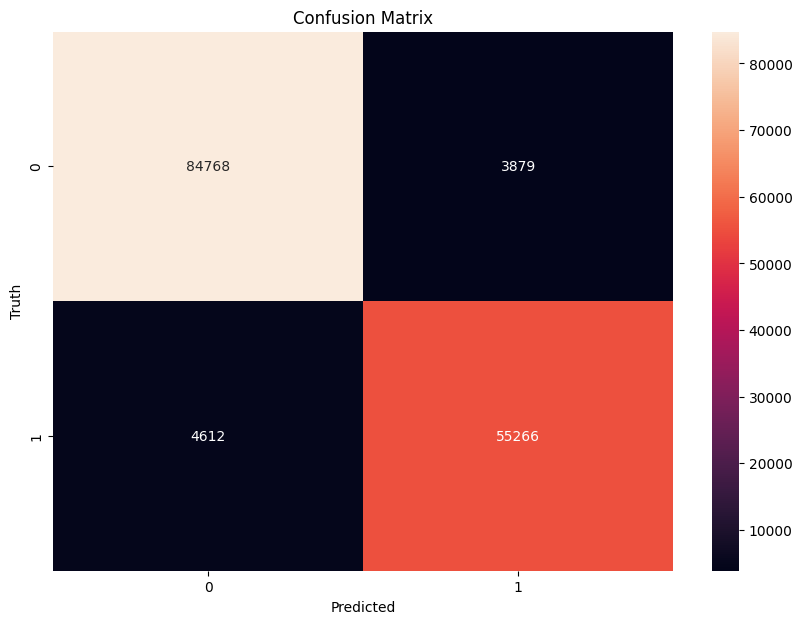

In [ ]:
cm = tf.math.confusion_matrix(labels= Y_test['faulty'] ,predictions=y_binary_pred)


plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

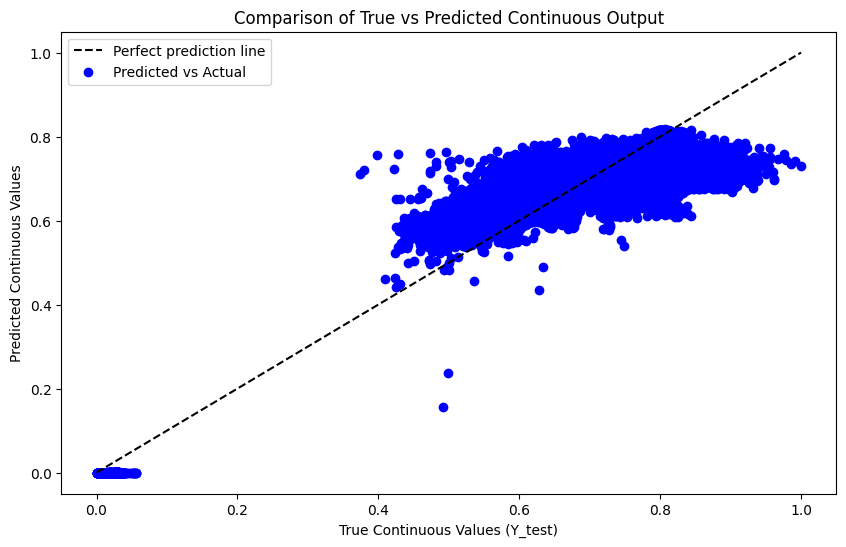

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot([0, 1], [0, 1], 'k--', label='Perfect prediction line')

plt.scatter(Y_test['trq_margin'], y_continuous_pred, color='blue', label='Predicted vs Actual')

plt.xlabel('True Continuous Values (Y_test)')
plt.ylabel('Predicted Continuous Values')
plt.title('Comparison of True vs Predicted Continuous Output')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


Y = pd.read_csv('/content/drive/MyDrive/Data_Challenge_PHM2024_test_data/y_train.csv')

trq_min = Y['trq_margin'].min()
trq_max = Y['trq_margin'].max()

# Inverse scaling function
def inverse_scaling(scaled_values, min_value, max_value):
    return scaled_values * (max_value - min_value) + min_value

# Inverse scaling for the predicted values
y_continuous_pred_rescaled = inverse_scaling(y_continuous_pred, trq_min, trq_max)
Y_test['trq_margin'] = inverse_scaling(Y_test['trq_margin'], trq_min, trq_max)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test['trq_margin'], y_continuous_pred_rescaled)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test['trq_margin'], y_continuous_pred_rescaled)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared (R²) - how well the predictions approximate the true values
r2 = r2_score(Y_test['trq_margin'], y_continuous_pred_rescaled)
print(f"R-squared (R²): {r2}")

#Rescaling
Y_test['trq_margin'] = (Y_test['trq_margin'] - Y_test['trq_margin'].min()) / (Y_test['trq_margin'].max() - Y_test['trq_margin'].min())

Mean Squared Error (MSE): 35.528623540651026
Mean Absolute Error (MAE): 4.778649229539244
R-squared (R²): 0.8292842099718871


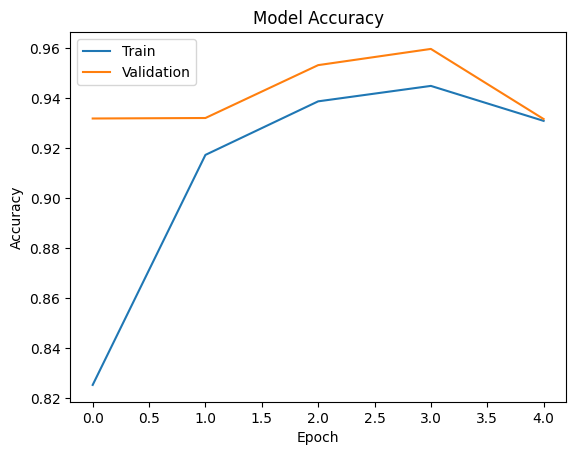

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Bidirectional GRU Model

In [ ]:
K.clear_session()

model = Sequential()

model.add(Bidirectional(GRU(32, activation='relu'), input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 64)                  │           6,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,954 (46.70 KB)

 Trainable params: 11,954 (46.70 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, Y_train, epochs=n_epoch, batch_size=b_size, validation_data = val_dat)

Epoch 1/5
9283/9283 ━━━━━━━━━━━━━━━━━━━━ 96s 10ms/step - accuracy: 0.5970 - loss: 0.2587 - val_accuracy: 0.5968 - val_loss: 0.1292
Epoch 2/5
9283/9283 ━━━━━━━━━━━━━━━━━━━━ 140s 10ms/step - accuracy: 0.6236 - loss: 0.1203 - val_accuracy: 0.9304 - val_loss: 0.0288
Epoch 3/5
9283/9283 ━━━━━━━━━━━━━━━━━━━━ 145s 10ms/step - accuracy: 0.8951 - loss: 0.0369 - val_accuracy: 0.9427 - val_loss: 0.0203
Epoch 4/5
9283/9283 ━━━━━━━━━━━━━━━━━━━━ 98s 11ms/step - accuracy: 0.9214 - loss: 0.0278 - val_accuracy: 0.9386 - val_loss: 0.0178
Epoch 5/5
9283/9283 ━━━━━━━━━━━━━━━━━━━━ 140s 10ms/step - accuracy: 0.9344 - loss: 0.0235 - val_accuracy: 0.9619 - val_loss: 0.0138


In [ ]:
y_pred = model.predict(X_test)
y_pred.shape

4642/4642 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step


(148525, 2)

In [ ]:
y_binary_pred = np.round(y_pred[:,0])
y_continuous_pred  = y_pred[:,1]

Text(95.72222222222221, 0.5, 'Truth')

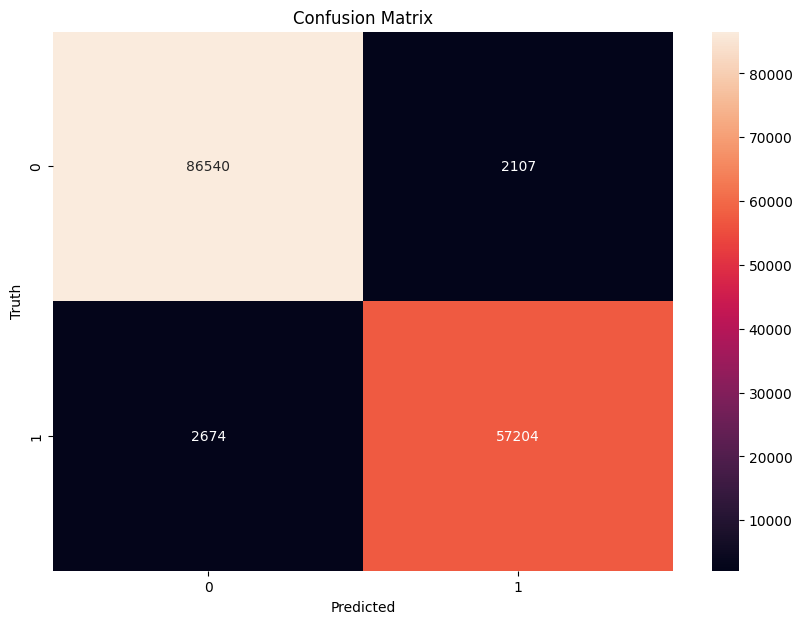

In [ ]:
cm = tf.math.confusion_matrix(labels= Y_test['faulty'] ,predictions=y_binary_pred)


plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

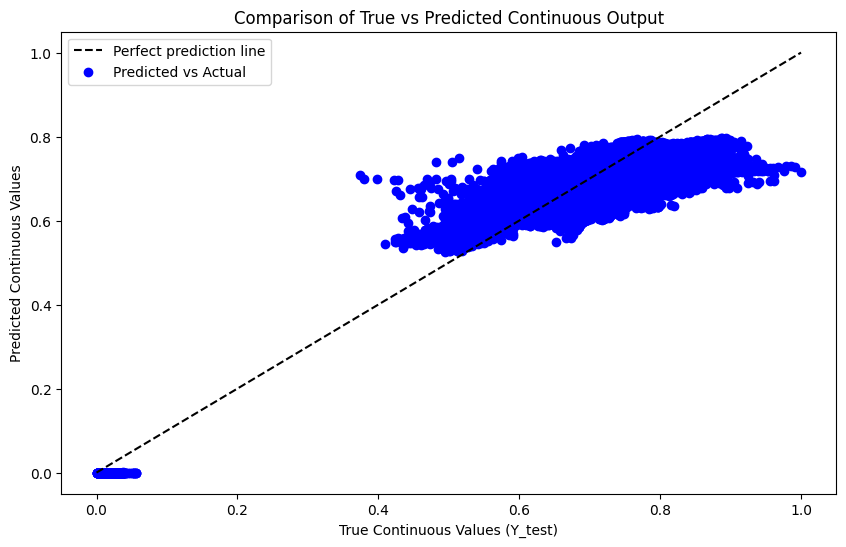

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot([0, 1], [0, 1], 'k--', label='Perfect prediction line')

plt.scatter(Y_test['trq_margin'], y_continuous_pred, color='blue', label='Predicted vs Actual')

plt.xlabel('True Continuous Values (Y_test)')
plt.ylabel('Predicted Continuous Values')
plt.title('Comparison of True vs Predicted Continuous Output')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


Y = pd.read_csv('/content/drive/MyDrive/Data_Challenge_PHM2024_test_data/y_train.csv')

trq_min = Y['trq_margin'].min()
trq_max = Y['trq_margin'].max()

# Inverse scaling function
def inverse_scaling(scaled_values, min_value, max_value):
    return scaled_values * (max_value - min_value) + min_value

# Inverse scaling for the predicted values
y_continuous_pred_rescaled = inverse_scaling(y_continuous_pred, trq_min, trq_max)
Y_test['trq_margin'] = inverse_scaling(Y_test['trq_margin'], trq_min, trq_max)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test['trq_margin'], y_continuous_pred_rescaled)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test['trq_margin'], y_continuous_pred_rescaled)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared (R²) - how well the predictions approximate the true values
r2 = r2_score(Y_test['trq_margin'], y_continuous_pred_rescaled)
print(f"R-squared (R²): {r2}")

#Rescaling
Y_test['trq_margin'] = (Y_test['trq_margin'] - Y_test['trq_margin'].min()) / (Y_test['trq_margin'].max() - Y_test['trq_margin'].min())

Mean Squared Error (MSE): 30.098218490017423
Mean Absolute Error (MAE): 4.340966391386572
R-squared (R²): 0.8553774214730547


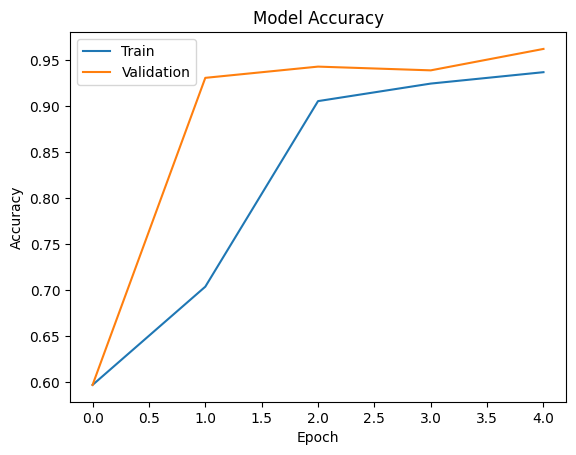

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Residual Connections in MLP

In [ ]:
K.clear_session()

from tensorflow.keras.layers import Add, Input
from tensorflow.keras.models import Model

input_layer = Input(shape=(X_train.shape[1],))

dense1 = Dense(64, activation='relu')(input_layer)
dense2 = Dense(64, activation='relu')(dense1)
residual = Add()([dense1, dense2])

dense3 = Dense(32, activation='relu')(residual)
output_layer = Dense(2, activation='sigmoid')(dense3)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 7)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 64)             │            512 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │          4,160 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 64)             │              0 │ dense[0][0],           │
│                           │                        │                │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 32)             │          2,080 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 2)              │             66 │ dense_2[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 6,818 (26.63 KB)

 Trainable params: 6,818 (26.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, Y_train, epochs=n_epoch, batch_size=b_size, validation_data = val_dat)

Epoch 1/5
9283/9283 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.6960 - loss: 0.2131 - val_accuracy: 0.6985 - val_loss: 0.2073
Epoch 2/5
9283/9283 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.7027 - loss: 0.2094 - val_accuracy: 0.7107 - val_loss: 0.2013
Epoch 3/5
9283/9283 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.7110 - loss: 0.2054 - val_accuracy: 0.5787 - val_loss: 0.2698
Epoch 4/5
9283/9283 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6120 - loss: 0.2550 - val_accuracy: 0.5968 - val_loss: 0.2582
Epoch 5/5
9283/9283 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.5965 - loss: 0.2626 - val_accuracy: 0.5968 - val_loss: 0.2582


In [ ]:
y_pred = model.predict(X_test)
y_pred.shape

4642/4642 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


(148525, 2)

In [ ]:
y_binary_pred = np.round(y_pred[:,0])
y_continuous_pred  = y_pred[:,1]

Text(95.72222222222221, 0.5, 'Truth')

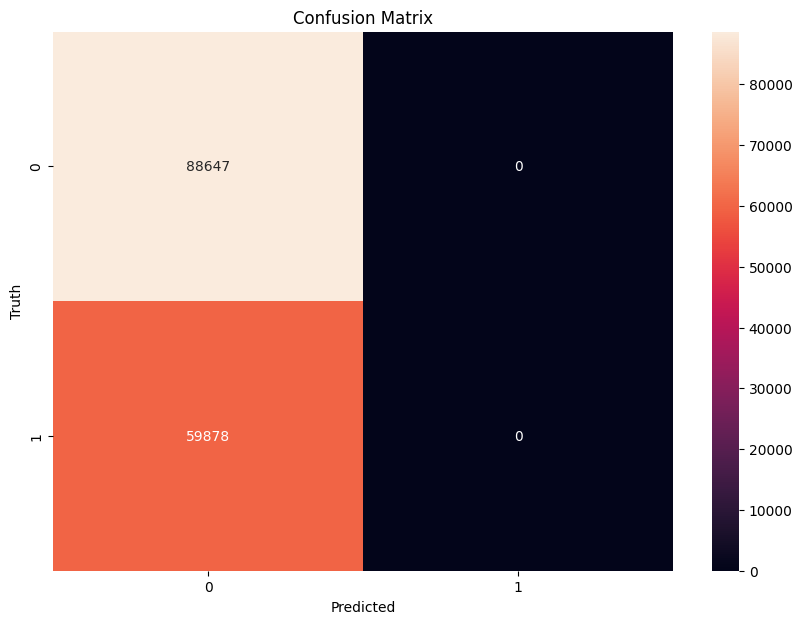

In [ ]:
cm = tf.math.confusion_matrix(labels= Y_test['faulty'] ,predictions=y_binary_pred)


plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

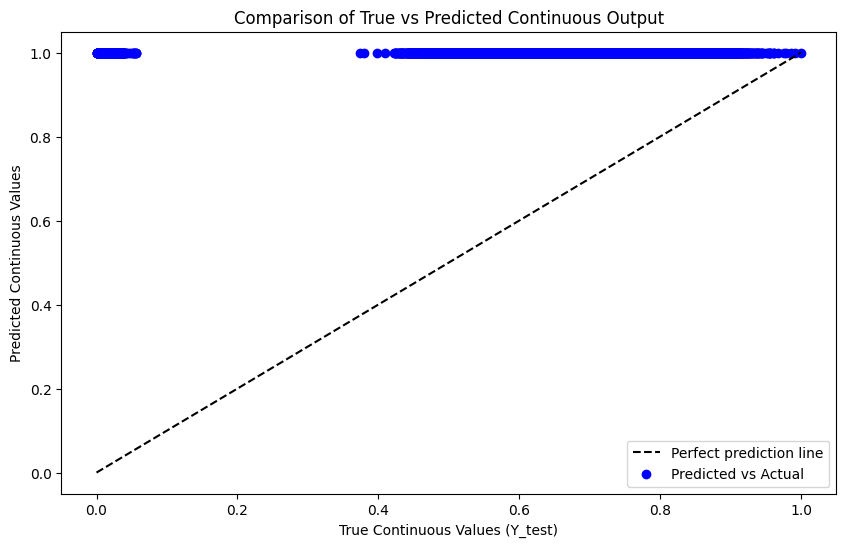

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot([0, 1], [0, 1], 'k--', label='Perfect prediction line')

plt.scatter(Y_test['trq_margin'], y_continuous_pred, color='blue', label='Predicted vs Actual')

plt.xlabel('True Continuous Values (Y_test)')
plt.ylabel('Predicted Continuous Values')
plt.title('Comparison of True vs Predicted Continuous Output')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


Y = pd.read_csv('/content/drive/MyDrive/Data_Challenge_PHM2024_test_data/y_train.csv')

trq_min = Y['trq_margin'].min()
trq_max = Y['trq_margin'].max()

# Inverse scaling function
def inverse_scaling(scaled_values, min_value, max_value):
    return scaled_values * (max_value - min_value) + min_value

# Inverse scaling for the predicted values
y_continuous_pred_rescaled = inverse_scaling(y_continuous_pred, trq_min, trq_max)
Y_test['trq_margin'] = inverse_scaling(Y_test['trq_margin'], trq_min, trq_max)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test['trq_margin'], y_continuous_pred_rescaled)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test['trq_margin'], y_continuous_pred_rescaled)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared (R²) - how well the predictions approximate the true values
r2 = r2_score(Y_test['trq_margin'], y_continuous_pred_rescaled)
print(f"R-squared (R²): {r2}")

#Rescaling
Y_test['trq_margin'] = (Y_test['trq_margin'] - Y_test['trq_margin'].min()) / (Y_test['trq_margin'].max() - Y_test['trq_margin'].min())

Mean Squared Error (MSE): 1342.765205170132
Mean Absolute Error (MAE): 33.68455994947258
R-squared (R²): -5.452015304240513


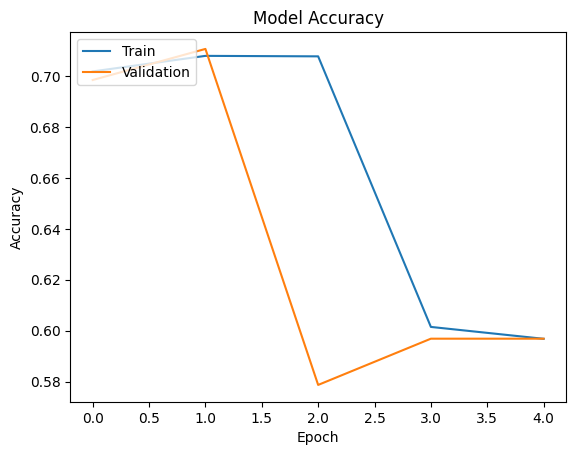

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Transformer Encoder

In [ ]:
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Flatten

K.clear_session()

model = Sequential()

input_layer = Input(shape=(X_train.shape[1], 1))

attn_output = MultiHeadAttention(num_heads=2, key_dim=32)(input_layer, input_layer)
norm_layer = LayerNormalization()(attn_output)

flatten_layer = Flatten()(norm_layer)
dense = Dense(64, activation='relu')(flatten_layer)
output_layer = Dense(2, activation='sigmoid')(dense)

model = Model(inputs=input_layer, outputs=output_layer)


model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 7, 1)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 7, 1)           │            449 │ input_layer[0][0],     │
│ (MultiHeadAttention)      │                        │                │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 7, 1)           │              2 │ multi_head_attention[… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 7)              │              0 │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 64)             │            512 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 2)              │            130 │ dense[0][0]            │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,093 (4.27 KB)

 Trainable params: 1,093 (4.27 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, Y_train, epochs=n_epoch, batch_size=b_size, validation_data = val_dat)

Epoch 1/5
9283/9283 ━━━━━━━━━━━━━━━━━━━━ 56s 6ms/step - accuracy: 0.5971 - loss: 0.1311 - val_accuracy: 0.5968 - val_loss: 0.1292
Epoch 2/5
9283/9283 ━━━━━━━━━━━━━━━━━━━━ 79s 5ms/step - accuracy: 0.5972 - loss: 0.1286 - val_accuracy: 0.5968 - val_loss: 0.1292
Epoch 3/5
9283/9283 ━━━━━━━━━━━━━━━━━━━━ 86s 6ms/step - accuracy: 0.5970 - loss: 0.1286 - val_accuracy: 0.5968 - val_loss: 0.1292
Epoch 4/5
9283/9283 ━━━━━━━━━━━━━━━━━━━━ 80s 6ms/step - accuracy: 0.5970 - loss: 0.1286 - val_accuracy: 0.5968 - val_loss: 0.1292
Epoch 5/5
9283/9283 ━━━━━━━━━━━━━━━━━━━━ 78s 5ms/step - accuracy: 0.5973 - loss: 0.1286 - val_accuracy: 0.5968 - val_loss: 0.1292


In [ ]:
y_pred = model.predict(X_test)
y_pred.shape

4642/4642 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


(148525, 2)

In [ ]:
y_binary_pred = np.round(y_pred[:,0])
y_continuous_pred  = y_pred[:,1]

Text(95.72222222222221, 0.5, 'Truth')

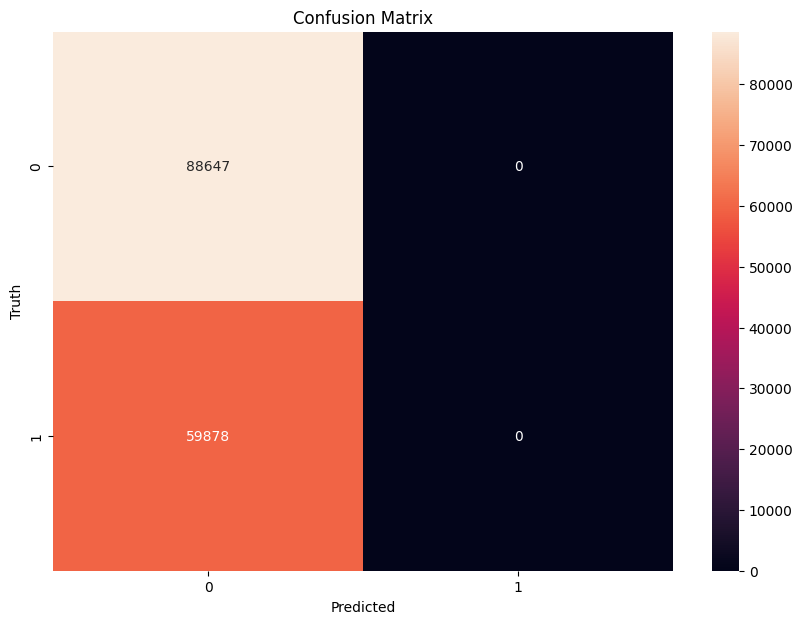

In [ ]:
cm = tf.math.confusion_matrix(labels= Y_test['faulty'] ,predictions=y_binary_pred)


plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

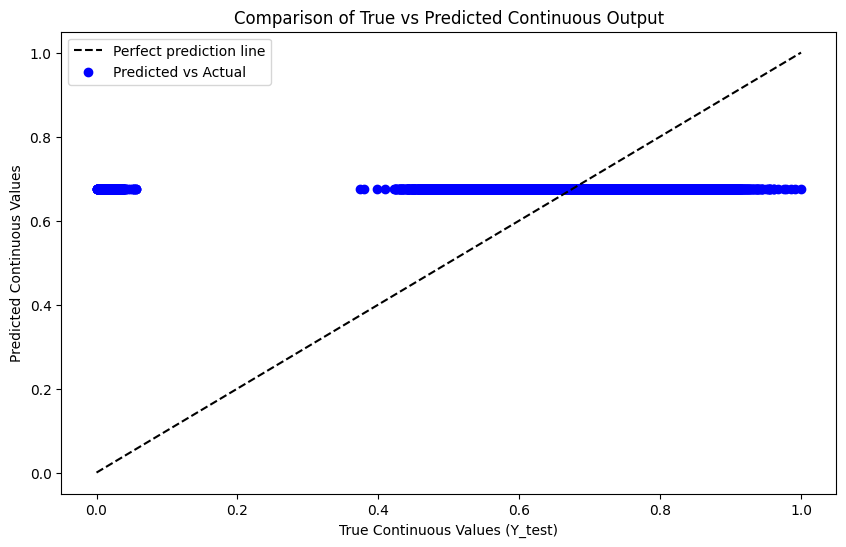

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot([0, 1], [0, 1], 'k--', label='Perfect prediction line')

plt.scatter(Y_test['trq_margin'], y_continuous_pred, color='blue', label='Predicted vs Actual')

plt.xlabel('True Continuous Values (Y_test)')
plt.ylabel('Predicted Continuous Values')
plt.title('Comparison of True vs Predicted Continuous Output')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


Y = pd.read_csv('/content/drive/MyDrive/Data_Challenge_PHM2024_test_data/y_train.csv')

trq_min = Y['trq_margin'].min()
trq_max = Y['trq_margin'].max()

# Inverse scaling function
def inverse_scaling(scaled_values, min_value, max_value):
    return scaled_values * (max_value - min_value) + min_value

# Inverse scaling for the predicted values
y_continuous_pred_rescaled = inverse_scaling(y_continuous_pred, trq_min, trq_max)
Y_test['trq_margin'] = inverse_scaling(Y_test['trq_margin'], trq_min, trq_max)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test['trq_margin'], y_continuous_pred_rescaled)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test['trq_margin'], y_continuous_pred_rescaled)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared (R²) - how well the predictions approximate the true values
r2 = r2_score(Y_test['trq_margin'], y_continuous_pred_rescaled)
print(f"R-squared (R²): {r2}")

#Rescaling
Y_test['trq_margin'] = (Y_test['trq_margin'] - Y_test['trq_margin'].min()) / (Y_test['trq_margin'].max() - Y_test['trq_margin'].min())

Mean Squared Error (MSE): 210.76998981794458
Mean Absolute Error (MAE): 10.010436374902362
R-squared (R²): -0.01275427360190906


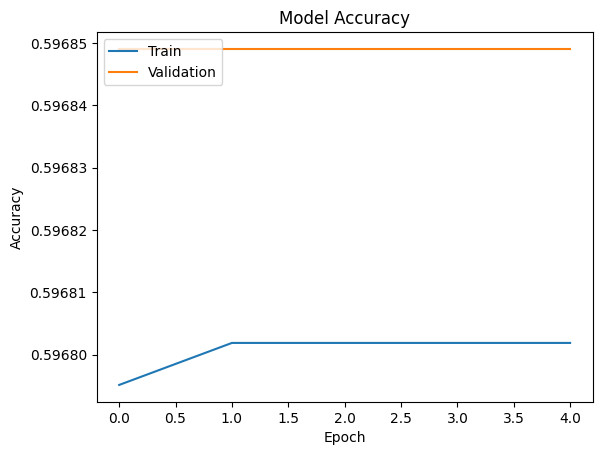

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

| Model                        | MSE              | MAE              | R²                | Binary Accuracy  |
|------------------------------|------------------|------------------|-------------------|------------------|
| Fully Connected Neural Network with Dropout        | 30.88            | 4.48             | 0.8449            | 0.9503           |
| LSTM                          | 34.54            | 4.24             | 0.8340            | 0.9299           |
| BLSTM                         | 26.38            | 4.18             | 0.8732            | 0.9580           |
| GRU Model                     | 35.53            | 4.78             | 0.8293            | 0.9483           |
| BGRU                          | 30.10            | 4.34             | 0.8554            | 0.9678           |
| Residual Connections in MLP   | 1342.77          | 33.68            | -5.4520           | 0.5968           |
| Transformer Encoder           | 210.77           | 10.01            | -0.0128           | 0.5968           |


## Conclusion

After evaluating the performance of various models based on both continuous output metrics (MSE, MAE, R²) and binary output accuracy, it is evident that the **BLSTM** model stands out as the best choice. It demonstrates superior performance for continuous output with the lowest MSE (26.38) and the highest R² (0.8732), indicating accurate predictions of the torque margin.

Additionally, the **BGRU** model shows excellent binary accuracy (0.9678) and performs reasonably well for continuous output (MSE: 30.10, R²: 0.8554). While it excels in binary classification, the **BLSTM** remains the more balanced option for tasks requiring both continuous and binary outputs.

In summary, **BLSTM** is recommended for its overall effectiveness in both regression and classification tasks, making it a reliable choice for our modeling needs.
